# Expectation maximization

$$ \begin{eqnarray} 
 z_i &\sim & Multinomial(\phi) \\
 x_i|z_i & \sim & \mathcal{N}(\mu_{z_i}, \sigma_{z_i})) \\
\end{eqnarray}$$ 


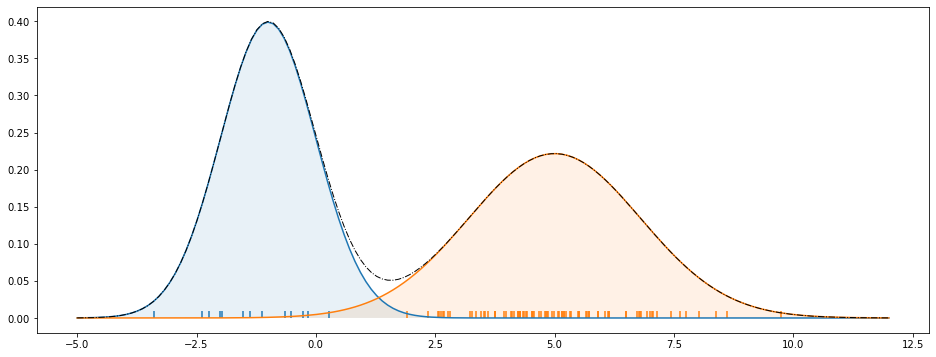

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

np.random.seed(654)
# Draw samples from two Gaussian w.p. z_i ~ Bernoulli(phi)
generative_m = np.array([stats.norm(-1, 1), stats.norm(5, 1.8)])
z = stats.bernoulli(0.9).rvs(100)
x_i = np.array([g.rvs() for g in generative_m[z]])

# plot generated data and the latent distributions
x = np.linspace(-5, 12, 150)
plt.figure(figsize=(16, 6))
plt.plot(x, generative_m[0].pdf(x))
plt.plot(x, generative_m[1].pdf(x))
plt.plot(x, generative_m[0].pdf(x) + generative_m[1].pdf(x), lw=1, ls='-.', color='black')
plt.fill_betweenx(generative_m[0].pdf(x), x, alpha=0.1)
plt.fill_betweenx(generative_m[1].pdf(x), x, alpha=0.1)
plt.vlines(x_i, 0, 0.01, color=np.array(['C0', 'C1'])[z])
plt.show()

# Log likelihood
Let $\theta = \{ \mu, \sigma \}$.
$$\ell(\theta) = \sum_{i=1}^n \log P(x_i; \theta)  $$

Or in vector form:

$$\ell(\theta) = \log P(x; \theta)  $$

This log likelihood function cannot be solved directly as it not includes the latent variable $z$.

$$ \ell(\theta) = \sum_{k=1}^K \log P(x | z_k; \theta) P(z_k) $$

## Continuous form

$$ \begin{eqnarray}
\ell(\theta) & = & \int_z \log P(x | \theta, z) P(z) dz \\
\log P(x; \theta)& = & \int_z \log P(x | \theta, z) P(z) dz
\end{eqnarray}$$





**Jensens inequality:**
*Only for concave functions*

let $f$ be a concave function.

$$ E[f(X)] \le f(E[X]) $$

**Jensens equality:**
$$ E[f(X)] = f(E[X]) \iff X = E[X] $$

## Evidence Lower BOund


Multiply the **evidence** w/ an arbitrary distribution over $Z, \quad \frac{Q(z)}{Q(z)} = 1$ 

$$ \begin{eqnarray}
\log P(x; \theta)& = & \int \log Q(z) \frac{ P(x | \theta, z) P(z)}{Q(z)} dz \\
& = & \log E_{z \sim Q}[ \frac{ P(x | \theta, z) P(z)}{Q(z)}] \\
\end{eqnarray}$$

As the log function is a concave function, we can apply Jensen's inequality.

$$ \begin{eqnarray}
\log P(x; \theta)& = & \log E_{z \sim Q}[ \frac{ P(x | \theta, z) P(z)}{Q(z)}] \\
& \ge &  E_{z \sim Q}[ \log \frac{ P(x | \theta, z) P(z)}{Q(z)}]
\end{eqnarray}$$



Resulting in a lower bound on the evidence called the **ELBO**:

$$ \begin{eqnarray}
\log P(x; \theta)& \ge &  E_{z \sim Q}[ \log \frac{ P(x | \theta, z) P(z)}{Q(z)}]
\end{eqnarray}$$


# Now what?

Jensen's inequality holds to **equaltiy** if and only if $X \iff E[X]$. This will be the case if we choose a distribution that leads to:

$$ \begin{eqnarray}
\frac{P(x|z) P(z)}{Q(z)} &=& \frac{P(x, z)}{Q(z)} = c
\end{eqnarray}$$

Wich means that 

$$ P(x, z; \theta) \propto Q(z) $$

A next requirement is that $\int_z Q(z) dz = 1$ (requirement of probability distribution). And because $Q(z)$ is a probability distribution, it must integrate to one; $\int_z Q(z) dz = 1$. So ideally we want to take joint distribution $P(x, z; \theta)$ and transform it so that it is proportional to itself, but also sums to 1 over all values of $z_i$. It turns out we can find that by normalizing the joint distribution.

$$ \begin{eqnarray}
\int_z \frac{P(x, z; \theta)}{\int_z P(x, z; \theta) dz} dz &=& 1 \\
\end{eqnarray}$$

This will lead to:

$$ \begin{eqnarray}
Q(z) &=& \frac{P(x, z; \theta)}{\int_z P(x, z; \theta) dz}  \\
&=& \frac{P(x, z; \theta)}{\int_z P(x; \theta)} \\
&=& P(z|x; \theta)
\end{eqnarray}$$

## Gaussian mixture model

### Expectation
Given a Gaussian mixture model, observed data points $x$ and current parameters $\theta_t$ find $Q(z; \theta_t) = P(z|x; \theta_t)$.

In [5]:
# Data points x
x_i

array([ 4.28244273,  4.66972656,  3.35275075,  5.65085616,  3.74751768,
        9.75240814,  5.15756521,  4.80213993,  5.90145058,  4.84288191,
        4.71273852, -0.63758867, -1.38915329,  6.71697406,  7.00596187,
        5.15422491,  5.09580485,  5.20293865,  6.76574344, -1.51645305,
        2.65304672,  6.81892055,  2.77103106,  5.06418788,  5.72517362,
        3.54313443,  5.67858554, -1.96777689,  4.35169594,  5.51107055,
        2.57224619,  4.97843073,  4.32989217,  5.51861638,  4.51797044,
        4.52825271,  6.93340533,  4.94273792,  2.54969132,  2.81541702,
        4.81172184,  5.19576022,  6.11967179,  3.5235398 , -2.24692387,
        4.23428727,  7.15230773,  6.50022463,  8.60608829,  4.27073679,
        7.75388195,  6.79259227, -2.37595108,  4.26260727,  4.09584051,
        0.26993383,  4.86431429,  8.38977374,  6.48961063,  4.09783105,
        4.40498267,  3.27433241,  7.44164281,  7.62286463,  3.21797707,
        4.42538064,  7.06135769,  3.94733606,  1.91385988,  5.23

In [10]:
import torch
from torch import nn
import torch.distributions as dist
import torch.nn.functional as F

In [11]:
x_i = torch.tensor(x_i, dtype=torch.float)

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


<BarContainer object of 100 artists>

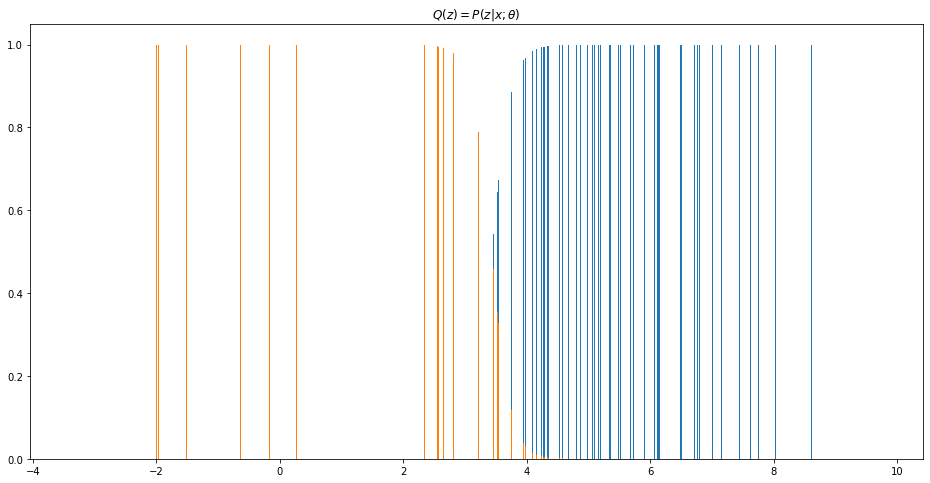

In [12]:
torch.manual_seed(1)

# Number of clusters
k = torch.tensor([2])

# Current values for theta
mu = dist.Uniform(x_i.min(), x_i.max()).sample(k) 
std = torch.ones(k)
phi = torch.ones(k)

def expectation(x, mu, std, phi, k):
    # P(z|x)
    qz = torch.zeros((k, x.shape[0]))
    phi = F.softmax(phi, dim=-1)
    
    for z in range(k):
        # Define the joint: P(z, x)
        qz[z] = (dist.Normal(mu[z], std[z]).log_prob(x) + torch.log(phi[z])).exp() 
    
    # normalize zo that marginalizing z would lead to p = 1
    # make conditional by dividing: 1/ P(x)
    qz = qz / qz.sum(0)
    
    return qz

qz = expectation(x_i, mu, std, phi, k)    

plt.figure(figsize=(16, 8)) 
plt.title(r"$Q(z) = P(z|x; \theta)$")
plt.bar(x_i, qz[0], width=0.01)
plt.bar(x_i, qz[1], width=0.01)

### Maximization

Optimize $\theta$ with the $Q(z; \theta_t)$ found in the expectation step.
$$ \text{ELBO} =  \sum_{z_i} Q(z_i) \log ( \frac{p(x_i| z_i; \theta_{t + 1}) p(z_i)}  {Q(z_i)}) $$

$$ \underset{\theta_{t + 1}}{\text{argmax ELBO}} $$

In [13]:
torch.manual_seed(0)
k = torch.tensor([2])
mu = dist.Uniform(x_i.min(), x_i.max()).sample(k) 

mu = torch.tensor(mu, dtype=torch.float, requires_grad=True)
std = torch.tensor(torch.ones(k), requires_grad=True)
phi = torch.tensor(torch.ones(k), requires_grad=True)


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


In [14]:
def log_likelihood(mu, std, phi, x):
    return torch.log(phi) + dist.Normal(mu, std).log_prob(x)

def get_elbo(mu, std, phi):
    elbo = 0
    for k in range(2):
        z_i = torch.tensor(1.)  # prior on z
        mu_i = mu[k]
        std_i = std[k]
        phi_i = F.softmax(phi, dim=-1)[k]
        
        elbo += (qz[k] * (log_likelihood(mu_i, std_i, phi_i, x_i) + torch.log(z_i) - torch.log(qz[k]))).sum()

    return elbo

elbo = get_elbo(mu, std, phi)
elbo

tensor(-941.1580, grad_fn=<AddBackward0>)

In [15]:
optim = torch.optim.Adam([mu, std, phi])

In [16]:
lr = 0.01
for i in range(150):
    
    # expectation step
    with torch.no_grad():
        qz = expectation(x_i, mu, std, phi, k)
    
    # maximization step
    for j in range(100):
        negative_elbo = -get_elbo(mu, std, phi)
        negative_elbo.backward()
        
        optim.step()
        optim.zero_grad()
    
    if i % 20 == 0:
        print("neg. ELBO: {:.2f}"
              "\tmu: {}"
              "\tstd: {}"
              "\tphi: {}"
             "".format(negative_elbo.item(), mu.data, std.data, F.softmax(phi, dim=-1).data))


neg. ELBO: 313.53	mu: tensor([3.0438, 6.6150])	std: tensor([1.0943, 1.0870])	phi: tensor([0.5431, 0.4569])
neg. ELBO: 230.57	mu: tensor([1.7261, 5.3456])	std: tensor([1.9472, 1.4770])	phi: tensor([0.2626, 0.7374])
neg. ELBO: 224.19	mu: tensor([0.4331, 5.1358])	std: tensor([2.2290, 1.5297])	phi: tensor([0.1794, 0.8206])
neg. ELBO: 222.64	mu: tensor([-0.5704,  5.0750])	std: tensor([2.0617, 1.5510])	phi: tensor([0.1491, 0.8509])
neg. ELBO: 219.15	mu: tensor([-1.3539,  5.0196])	std: tensor([1.0274, 1.5799])	phi: tensor([0.1279, 0.8721])
neg. ELBO: 219.14	mu: tensor([-1.3579,  5.0186])	std: tensor([1.0029, 1.5811])	phi: tensor([0.1277, 0.8723])
neg. ELBO: 219.14	mu: tensor([-1.3579,  5.0186])	std: tensor([1.0029, 1.5811])	phi: tensor([0.1277, 0.8723])
neg. ELBO: 219.14	mu: tensor([-1.3579,  5.0186])	std: tensor([1.0029, 1.5811])	phi: tensor([0.1277, 0.8723])


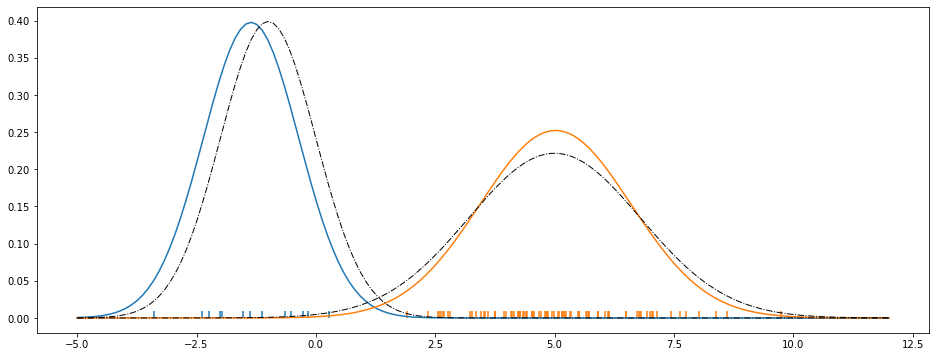

In [17]:
fitted_m = [stats.norm(mu, std) for mu, std in zip(mu.data, std.data)]

plt.figure(figsize=(16, 6))
plt.vlines(x_i, 0, 0.01, color=np.array(['C0', 'C1'])[z])
plt.plot(x, fitted_m[0].pdf(x))
plt.plot(x, fitted_m[1].pdf(x))
plt.plot(x, generative_m[0].pdf(x), color='black', lw=1, ls='-.')
plt.plot(x, generative_m[1].pdf(x), color='black', lw=1, ls='-.')


## GMM

### Expectation step
$$\begin{eqnarray}
w_{ij} := p(z_i = j|x_i; \theta) \\
\mu_j := \frac{\sum_{i=1}^nw_{ij} x_i} {\sum_{i=1}^nw_{ij}}
\end{eqnarray}$$


### Maximization step
$$\begin{eqnarray}
\mu_j := \frac{\sum_{i=1}^nw_{ij} x_i} {\sum_{i=1}^nw_{ij}} \\
\sigma_j :=  \sqrt{\frac{\sum_{i=1}^nw_{ij}(x_i - \mu_j)^2} {\sum_{i=1}^nw_{ij}}}
\end{eqnarray}$$

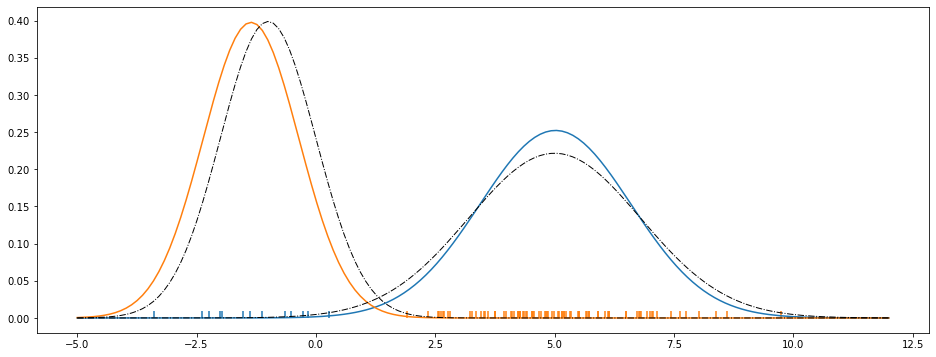

In [18]:
class EM:
    def __init__(self, k):
        self.k = k
        self.mu = None
        self.std = np.ones(k)
        self.w_ij = None
    [1] https://www.ritchievink.com/blog/2019/05/24/algorithm-breakdown-expectation-maximization/
        self.phi = np.ones(k) / k

    def expectation_step(self, x):
        for z_i in range(self.k):
            self.w_ij[z_i] = stats.norm(self.mu[z_i], self.std[z_i]).pdf(x) * self.phi[z_i]
        
        # normalize zo that marginalizing z would lead to p = 1
        self.w_ij /= self.w_ij.sum(0)

    def maximization_step(self, x):
        self.phi = self.w_ij.mean(1)
        self.std = ((self.w_ij * (x - self.mu[:, None])**2).sum(1) / self.w_ij.sum(1))**0.5
        self.mu = (self.w_ij * x).sum(1) / self.w_ij.sum(1)

    def fit(self, x):
        self.mu = np.random.uniform(x.min(), x.max(), size=self.k)
        self.w_ij = np.zeros((self.k, x.shape[0]))

        last_mu = np.ones(self.k) * np.inf
        while ~np.all(np.isclose(self.mu, last_mu)):
            last_mu = self.mu
            self.expectation_step(x)
            self.maximization_step(x)

m = EM(2)
m.fit(np.array(x_i))

fitted_m = [stats.norm(mu, std) for mu, std in zip(m.mu, m.std)]

plt.figure(figsize=(16, 6))
plt.vlines(x_i, 0, 0.01, color=np.array(['C0', 'C1'])[z])
plt.plot(x, fitted_m[0].pdf(x))
plt.plot(x, fitted_m[1].pdf(x))
plt.plot(x, generative_m[0].pdf(x), color='black', lw=1, ls='-.')
plt.plot(x, generative_m[1].pdf(x), color='black', lw=1, ls='-.')

# References
[1] https://www.ritchievink.com/blog/2019/05/24/algorithm-breakdown-expectation-maximization/